# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_capcut_1.csv")
df.head()

,userName,score,at,content
0,Aijar Kaeno,5,2024-04-25 09:05:37,Bagus bisa di pangkas bisa edit juga lagi add ...
1,Umya Shely,1,2024-04-25 09:05:29,Aplikasi nya makin kesini makin nga jelas saya...
2,Alfaoppi,5,2024-04-25 09:03:13,Karena bagus kalau cari templat
3,Fitrotunamaniyah,1,2024-04-25 09:03:09,Kenapa saya tidak bisa mendownload aplikasi in...
4,widya pramitha,1,2024-04-25 09:00:19,dulu bagus sekarang sering ngebag dibuka cuma ...


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Bagus bisa di pangkas bisa edit juga lagi add ...,Aijar Kaeno,2024-04-25 09:05:37
1,Aplikasi nya makin kesini makin nga jelas saya...,Umya Shely,2024-04-25 09:05:29
2,Karena bagus kalau cari templat,Alfaoppi,2024-04-25 09:03:13
3,Kenapa saya tidak bisa mendownload aplikasi in...,Fitrotunamaniyah,2024-04-25 09:03:09
4,dulu bagus sekarang sering ngebag dibuka cuma ...,widya pramitha,2024-04-25 09:00:19
...,...,...,...
194,GABISA SEARCH TEMPLATE ANEH!!!,kelvin alamsah,2024-04-25 04:48:04
195,"Membantu dalam ngedit, good",Dhea Paputungan,2024-04-25 04:44:52
196,Gk bisa doanload nya 🤢🤢🤢🤢,Nasya Hindarto,2024-04-25 04:43:20
197,Keroco bot,Syahm syalbi zada,2024-04-25 04:42:44


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,183,199,197
top,Bagus,Aijar Kaeno,2024-04-25 06:38:34
freq,11,1,2


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(183, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,bagus bisa di pangkas bisa edit juga lagi add ...,Aijar Kaeno,2024-04-25 09:05:37
1,aplikasi nya makin kesini makin nga jelas saya...,Umya Shely,2024-04-25 09:05:29
2,karena bagus kalau cari templat,Alfaoppi,2024-04-25 09:03:13
3,kenapa saya tidak bisa mendownload aplikasi in...,Fitrotunamaniyah,2024-04-25 09:03:09
4,dulu bagus sekarang sering ngebag dibuka cuma ...,widya pramitha,2024-04-25 09:00:19
...,...,...,...
194,gabisa search template aneh,kelvin alamsah,2024-04-25 04:48:04
195,membantu dalam ngedit good,Dhea Paputungan,2024-04-25 04:44:52
196,gk bisa doanload nya,Nasya Hindarto,2024-04-25 04:43:20
197,keroco bot,Syahm syalbi zada,2024-04-25 04:42:44


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [25]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,bagus pangkas edit add suara nya,Aijar Kaeno,2024-04-25 09:05:37
1,aplikasi nya makin kesini makin nga jelas mau ...,Umya Shely,2024-04-25 09:05:29
2,bagus kalau cari templat,Alfaoppi,2024-04-25 09:03:13
3,mendownload aplikasi mencobanya berkalikali te...,Fitrotunamaniyah,2024-04-25 09:03:09
4,dulu bagus sekarang sering ngebug dibuka cuma ...,widya pramitha,2024-04-25 09:00:19
...,...,...,...
194,gabisa search template aneh,kelvin alamsah,2024-04-25 04:48:04
195,membantu ngedit good,Dhea Paputungan,2024-04-25 04:44:52
196,gk download nya,Nasya Hindarto,2024-04-25 04:43:20
197,keroco bot,Syahm syalbi zada,2024-04-25 04:42:44


In [26]:
# Menginstall Library Sastrawi
!pip install Sastrawi

In [27]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,bagus pangkas edit add suara nya,Aijar Kaeno,2024-04-25 09:05:37
1,aplikasi nya makin kesini makin nga jelas mau ...,Umya Shely,2024-04-25 09:05:29
2,bagus kalau cari templat,Alfaoppi,2024-04-25 09:03:13
3,mendownload aplikasi mencobanya berkalikali tetap,Fitrotunamaniyah,2024-04-25 09:03:09
4,dulu bagus sekarang sering ngebug dibuka cuma ...,widya pramitha,2024-04-25 09:00:19
...,...,...,...
194,gabisa search template aneh,kelvin alamsah,2024-04-25 04:48:04
195,membantu ngedit good,Dhea Paputungan,2024-04-25 04:44:52
196,gk download nya,Nasya Hindarto,2024-04-25 04:43:20
197,keroco bot,Syahm syalbi zada,2024-04-25 04:42:44


In [28]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                [bagus, pangkas, edit, add, suara, nya]
1      [aplikasi, nya, makin, kesini, makin, nga, jel...
2                          [bagus, kalau, cari, templat]
3      [mendownload, aplikasi, mencobanya, berkalikal...
4      [dulu, bagus, sekarang, sering, ngebug, dibuka...
                             ...                        
194                     [gabisa, search, template, aneh]
195                             [membantu, ngedit, good]
196                                  [gk, download, nya]
197                                        [keroco, bot]
198    [adanya, aplikasi, capcut, sangat, terbantu, m...
Name: content, Length: 183, dtype: object

In [29]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_capcut_1.csv', index = False)


In [30]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_capcut_1.csv', encoding = 'latin1')
df_clean

,content
0,bagus pangkas edit add suara nya
1,aplikasi nya makin kesini makin nga jelas mau ...
2,bagus kalau cari templat
3,mendownload aplikasi coba berkalikali tetap
4,dulu bagus sekarang sering ngebug buka cuma mu...
...,...
178,gabisa search template aneh
179,bantu ngedit good
180,gk download nya
181,keroco bot


# **Translate**

In [32]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [33]:
import pandas as pd
from easynmt import EasyNMT

In [34]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_capcut_1.csv', encoding='latin1')

In [35]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [36]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 1.63MB/s]                   


In [37]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,bagus pangkas edit add suara nya
1,aplikasi nya makin kesini makin nga jelas mau ...
2,bagus kalau cari templat
3,mendownload aplikasi coba berkalikali tetap
4,dulu bagus sekarang sering ngebug buka cuma mu...
...,...
178,gabisa search template aneh
179,bantu ngedit good
180,gk download nya
181,keroco bot


In [38]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_capcut_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [39]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_capcut_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus pangkas edit add suara nya,Nice cut. Edit the sound add.
1,1,aplikasi nya makin kesini makin nga jelas mau ...,The app's getting here. The more clear it's go...
2,2,bagus kalau cari templat,It's good to get a template.
3,3,mendownload aplikasi coba berkalikali tetap,downloading applications repeatedly fixed
4,4,dulu bagus sekarang sering ngebug buka cuma mu...,It used to be good. Now it's often open. It's ...
...,...,...,...
178,178,gabisa search template aneh,can't search strange templates
179,179,bantu ngedit good,Help me with the good.
180,180,gk download nya,No downloads.
181,181,keroco bot,bot dicrocose


# **Labeling**

In [40]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_capcut_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,bagus pangkas edit add suara nya,Nice cut. Edit the sound add.
1,1,aplikasi nya makin kesini makin nga jelas mau ...,The app's getting here. The more clear it's go...
2,2,bagus kalau cari templat,It's good to get a template.
3,3,mendownload aplikasi coba berkalikali tetap,downloading applications repeatedly fixed
4,4,dulu bagus sekarang sering ngebug buka cuma mu...,It used to be good. Now it's often open. It's ...
...,...,...,...
178,178,gabisa search template aneh,can't search strange templates
179,179,bantu ngedit good,Help me with the good.
180,180,gk download nya,No downloads.
181,181,keroco bot,bot dicrocose


In [41]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [42]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 107
Netral = 57
Negatif = 19

Total Data Seluruhnya : 183


In [44]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,bagus pangkas edit add suara nya,Nice cut. Edit the sound add.,Positif
1,1,aplikasi nya makin kesini makin nga jelas mau ...,The app's getting here. The more clear it's go...,Positif
2,2,bagus kalau cari templat,It's good to get a template.,Positif
3,3,mendownload aplikasi coba berkalikali tetap,downloading applications repeatedly fixed,Positif
4,4,dulu bagus sekarang sering ngebug buka cuma mu...,It used to be good. Now it's often open. It's ...,Positif
...,...,...,...,...
178,178,gabisa search template aneh,can't search strange templates,Negatif
179,179,bantu ngedit good,Help me with the good.,Positif
180,180,gk download nya,No downloads.,Netral
181,181,keroco bot,bot dicrocose,Netral


In [45]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,bagus pangkas edit add suara nya,Nice cut. Edit the sound add.,Positif
1,aplikasi nya makin kesini makin nga jelas mau ...,The app's getting here. The more clear it's go...,Positif
2,bagus kalau cari templat,It's good to get a template.,Positif
3,mendownload aplikasi coba berkalikali tetap,downloading applications repeatedly fixed,Positif
4,dulu bagus sekarang sering ngebug buka cuma mu...,It used to be good. Now it's often open. It's ...,Positif
...,...,...,...
178,gabisa search template aneh,can't search strange templates,Negatif
179,bantu ngedit good,Help me with the good.,Positif
180,gk download nya,No downloads.,Netral
181,keroco bot,bot dicrocose,Netral


# **Visualisasi**


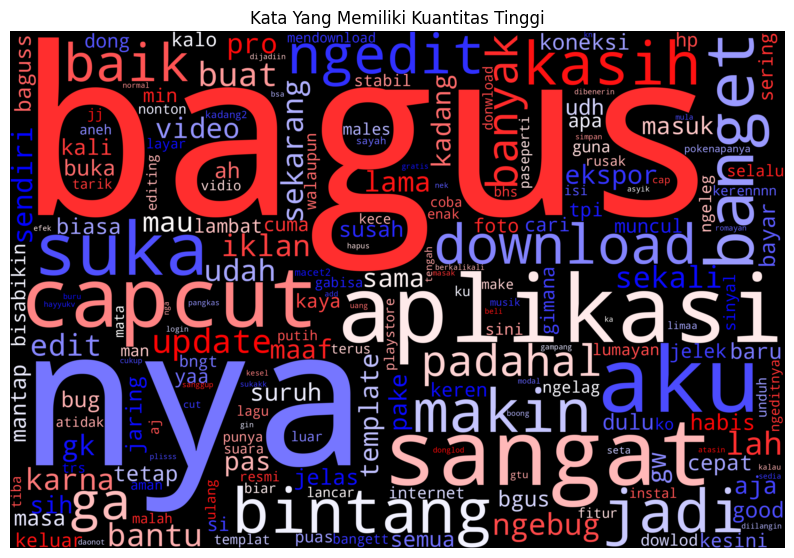

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


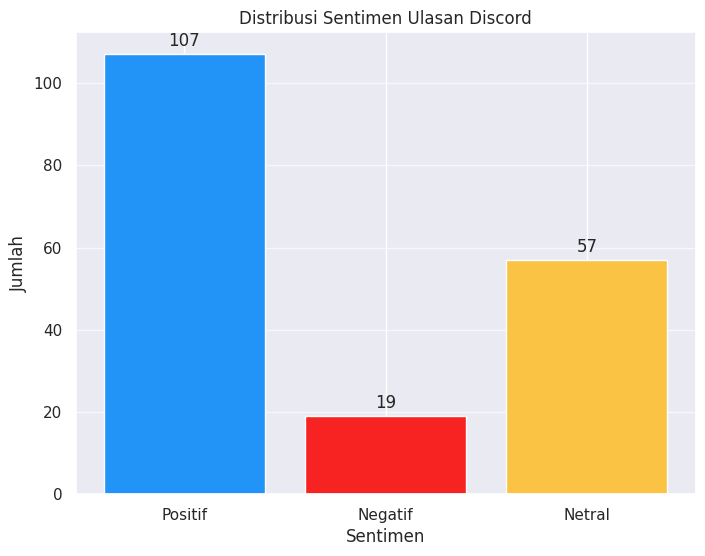

In [47]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [48]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,bagus pangkas edit add suara nya,Nice cut. Edit the sound add.,Positif
1,aplikasi nya makin kesini makin nga jelas mau ...,The app's getting here. The more clear it's go...,Positif
2,bagus kalau cari templat,It's good to get a template.,Positif
3,mendownload aplikasi coba berkalikali tetap,downloading applications repeatedly fixed,Positif
4,dulu bagus sekarang sering ngebug buka cuma mu...,It used to be good. Now it's often open. It's ...,Positif
...,...,...,...
175,oke,Okay.,Positif
177,good sangat bantu editing,good very help editing,Positif
178,gabisa search template aneh,can't search strange templates,Negatif
179,bantu ngedit good,Help me with the good.,Positif


In [49]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,bagus pangkas edit add suara nya,Nice cut. Edit the sound add.,1
1,aplikasi nya makin kesini makin nga jelas mau ...,The app's getting here. The more clear it's go...,1
2,bagus kalau cari templat,It's good to get a template.,1
3,mendownload aplikasi coba berkalikali tetap,downloading applications repeatedly fixed,1
4,dulu bagus sekarang sering ngebug buka cuma mu...,It used to be good. Now it's often open. It's ...,1
...,...,...,...
175,oke,Okay.,1
177,good sangat bantu editing,good very help editing,1
178,gabisa search template aneh,can't search strange templates,0
179,bantu ngedit good,Help me with the good.,1


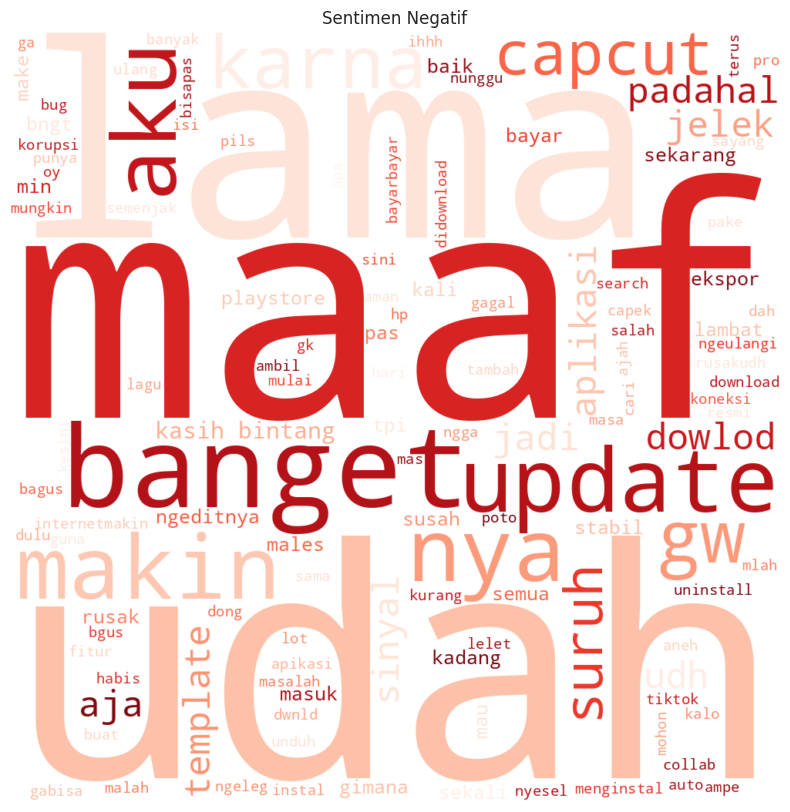

In [50]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

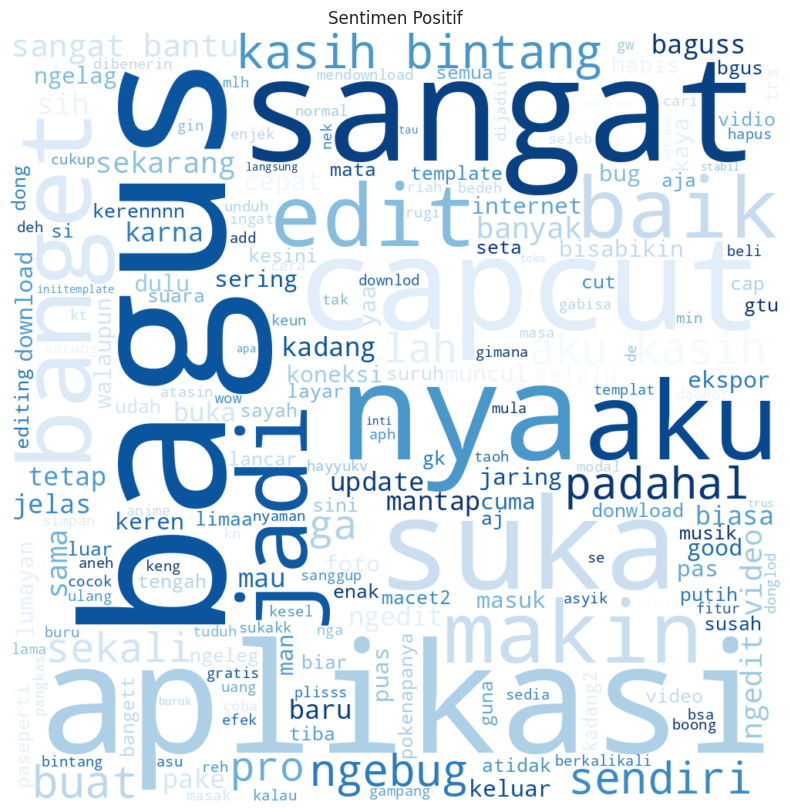

In [51]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [52]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    107
0     19
Name: count, dtype: int64

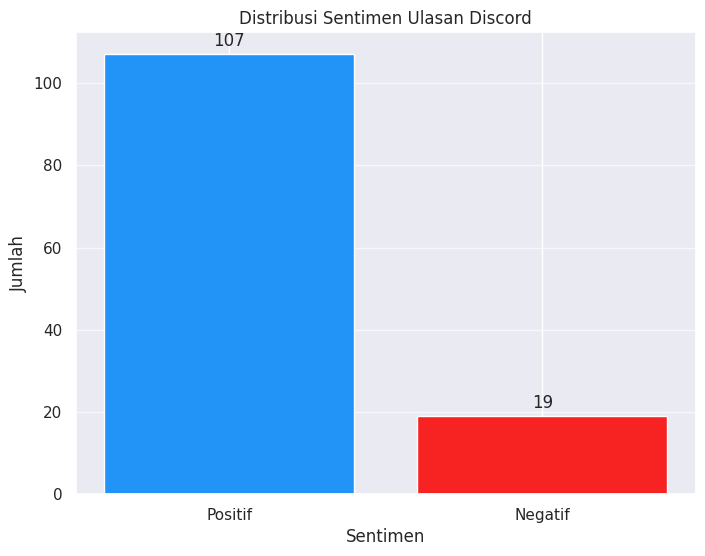

In [53]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

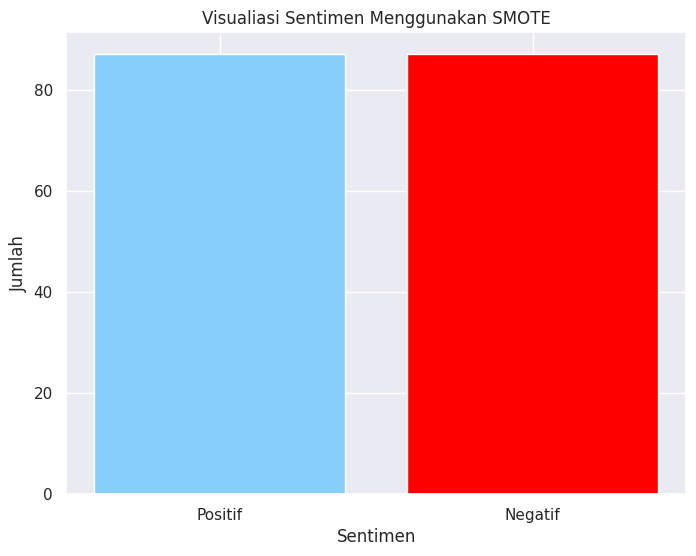

In [58]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [59]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [60]:
y_pred = naive_bayes.predict(X_test_vec)

In [61]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8076923076923077

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.57      0.67      0.62         6
     Positif       0.89      0.85      0.87        20

    accuracy                           0.81        26
   macro avg       0.73      0.76      0.74        26
weighted avg       0.82      0.81      0.81        26



# **Testing**


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasi sangat bagus dan juga lengkap templatenya
Hasil Analisis Sentimen Untuk Teks Baru : Positif
